In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import csv

## Reading

In [3]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 150

In [4]:
n_datasets = 4

In [5]:
raw = pd.read_csv("2-data/2.csv", delimiter=",")
raw

,Time (s),Signal strength,Bx (µT),By (µT),Bz (µT),Voltage (mV)
0,0.010000,42,-54.884605,-65.244896,-85.792969,-0.011714
1,0.020000,42,-54.888130,-65.243408,-85.835167,-0.011737
2,0.030000,42,-54.892399,-65.263634,-85.886253,-0.011722
3,0.040000,42,-54.896233,-65.301704,-85.932137,-0.011709
4,0.050000,43,-54.899315,-65.332832,-85.973511,-0.011697
...,...,...,...,...,...,...
2498,24.990000,41,21.764145,-39.158062,-70.558022,-0.011599
2499,25.000000,42,21.774317,-39.157417,-70.530144,-0.011574
2500,25.010000,41,21.772535,-39.156708,-70.500664,-0.011578
2501,25.020000,41,21.780560,-39.158859,-70.426315,-0.011617


In [106]:
t_raw = raw["Time (s)"].to_numpy()
v_raw = raw["Voltage (mV)"].to_numpy() * 1e3
b_raw = -raw["Bz (µT)"].to_numpy()

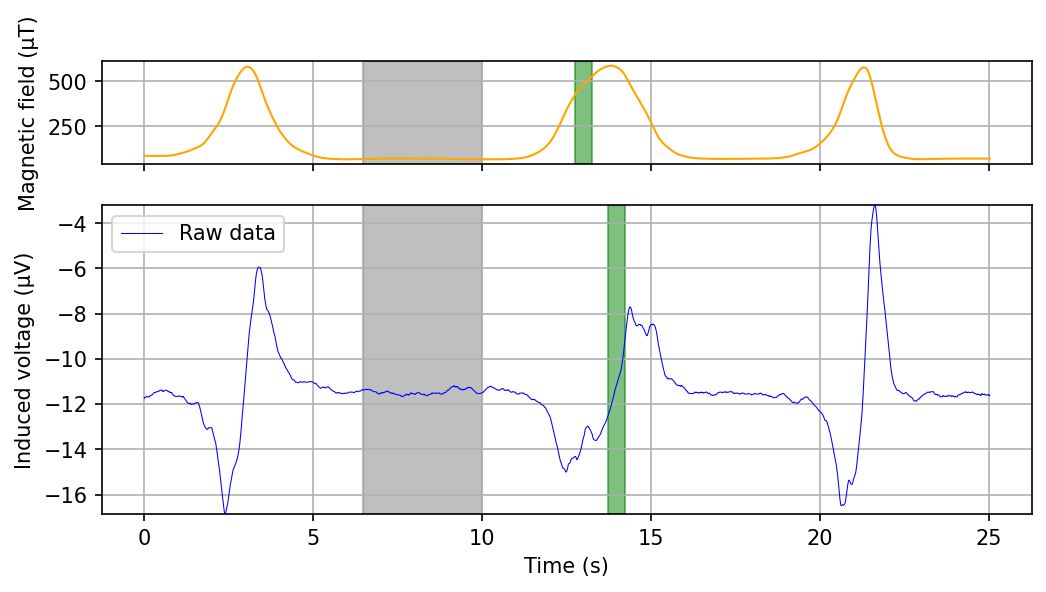

In [195]:
fig, [ax2, ax1] = plt.subplots(2,1,sharex=True,figsize=(8,4),gridspec_kw={'height_ratios': [1, 3]})

ax1.plot(t_raw, v_raw, lw=0.5, color="blue", label="Raw data")
ax1.set_ylabel("Induced voltage (µV)")
# ax1.set_ylim(-30,30)

ax1.legend()
ax1.grid()

ax2.plot(t_raw, b_raw, lw=1, color="orange")

ax2.grid()
ax2.set_ylabel("Magnetic field (µT)")
ax1.set_xlabel("Time (s)")

ax1.axvspan(6.5, 10, alpha=0.5, color="gray")
ax2.axvspan(6.5, 10, alpha=0.5, color="gray")

ax1.axvspan(13.75, 14.25, alpha=0.5, color="green")
ax2.axvspan(12.75, 13.25, alpha=0.5, color="green")

# ax2.set_ylim(-30,30)
# ax2.set_xlim(0,55)

plt.margins(0)

plt.show()

In [216]:
select = np.logical_or(
    np.logical_and( 2.75 <= t_raw, t_raw < 3.25 ),
    np.logical_and( 13.75 <= t_raw, t_raw < 14.25 ),
)
# select = t_raw>0
antiselect = np.logical_and( 6.5 <= t_raw, t_raw < 10 )

t = t_raw[select]
v = v_raw[select] - np.average(v_raw[antiselect])
b = b_raw[select] - np.average(b_raw[antiselect])

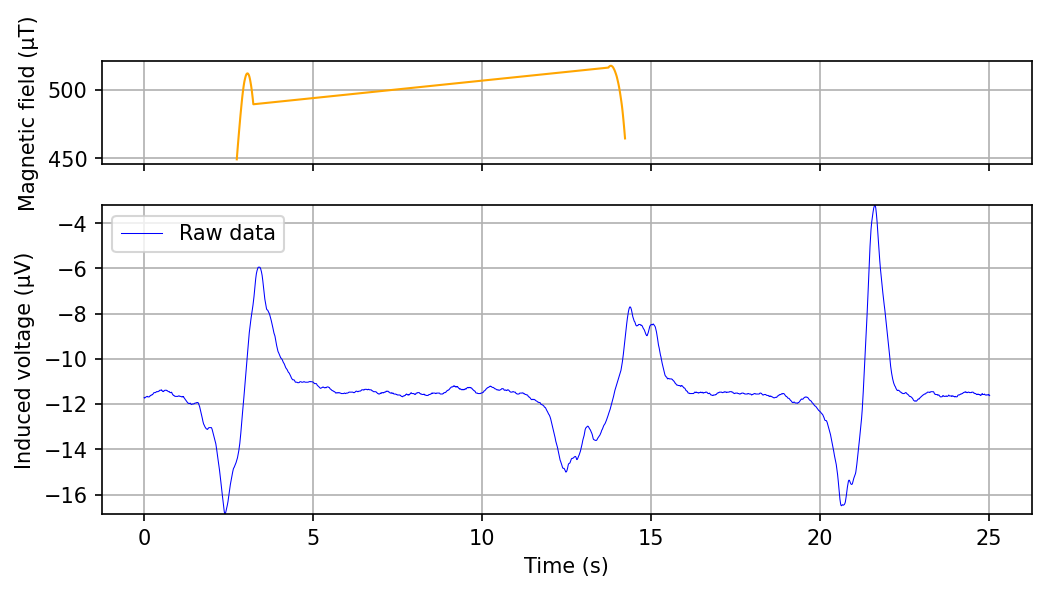

In [217]:
fig, [ax2, ax1] = plt.subplots(2,1,sharex=True,figsize=(8,4),gridspec_kw={'height_ratios': [1, 3]})

ax1.plot(t_raw, v_raw, lw=0.5, color="blue", label="Raw data")
ax1.set_ylabel("Induced voltage (µV)")
# ax1.set_ylim(-30,30)

ax1.legend()
ax1.grid()

ax2.plot(t, b, lw=1, color="orange")

ax2.grid()
ax2.set_ylabel("Magnetic field (µT)")
ax1.set_xlabel("Time (s)")

# ax2.set_ylim(-30,30)
# ax2.set_xlim(0,55)

plt.margins(0)

plt.show()

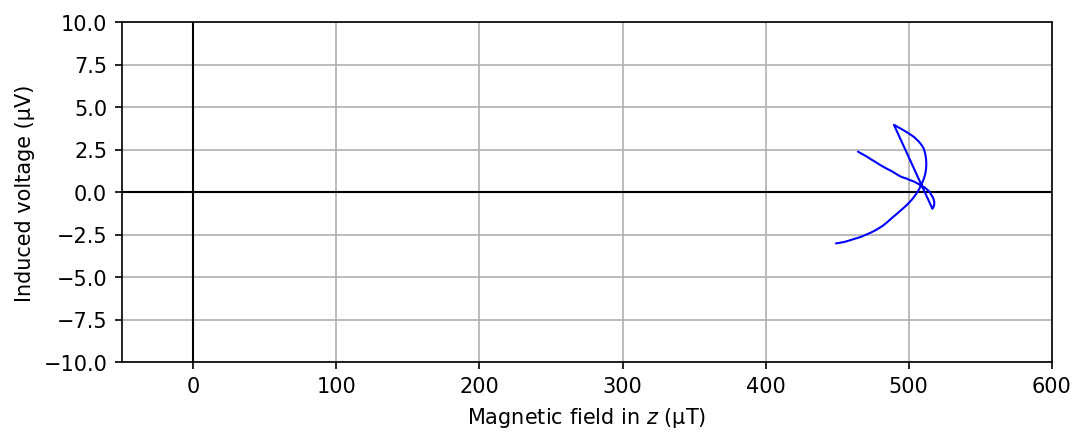

In [218]:
plt.rcParams['figure.figsize'] = [8, 3]
plt.axhline(0, lw=1, c="black")
plt.axvline(0, lw=1, c="black")
plt.plot(b, v, lw=1, color="blue")
plt.ylabel("Induced voltage (µV)")
plt.xlabel("Magnetic field in $z$ (µT)")
plt.xlim(-50, 600)
plt.ylim(-10,10)
plt.grid()

In [219]:
tt = t[1:]
vv = v[1:]
db = np.diff(b) / np.diff(t)

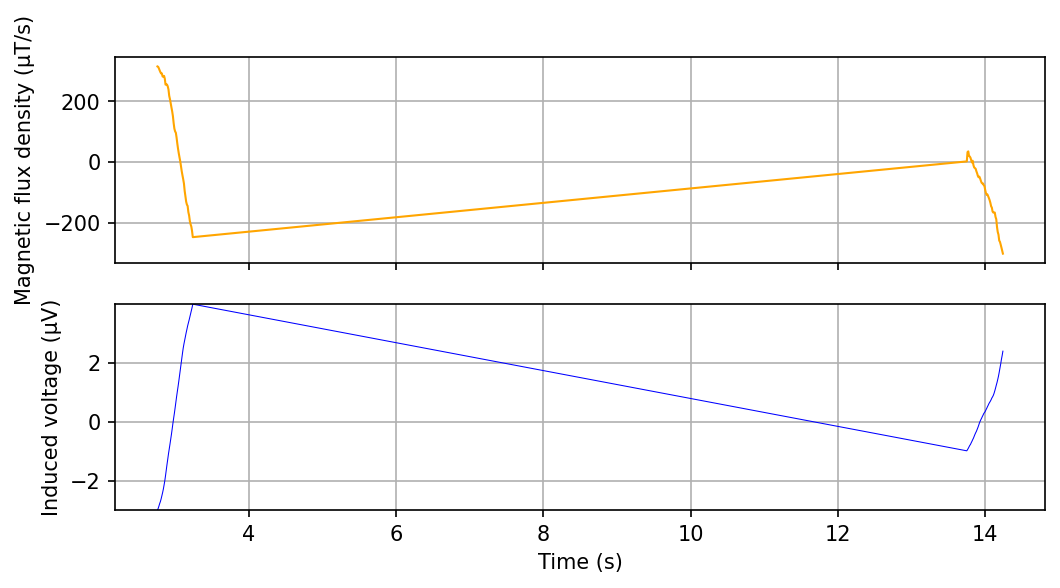

In [220]:
fig, [ax2, ax1] = plt.subplots(2,1,sharex=True,figsize=(8,4))

ax1.plot(tt, vv, lw=0.5, color="blue")
ax1.set_ylabel("Induced voltage (µV)")
# ax1.set_ylim(-30,30)

ax1.grid()

ax2.plot(tt, db, lw=1, color="orange")

ax2.grid()
ax2.set_ylabel("Magnetic flux density (µT/s)")
ax1.set_xlabel("Time (s)")

plt.margins(0)

plt.show()

In [221]:
fit = lambda dbdt, A: -dbdt * A
[A], [[covA]] = sp.optimize.curve_fit(fit, db, vv)
dA = np.sqrt(covA)
A, dA

(0.008282522103743355, 0.0006165979989756947)

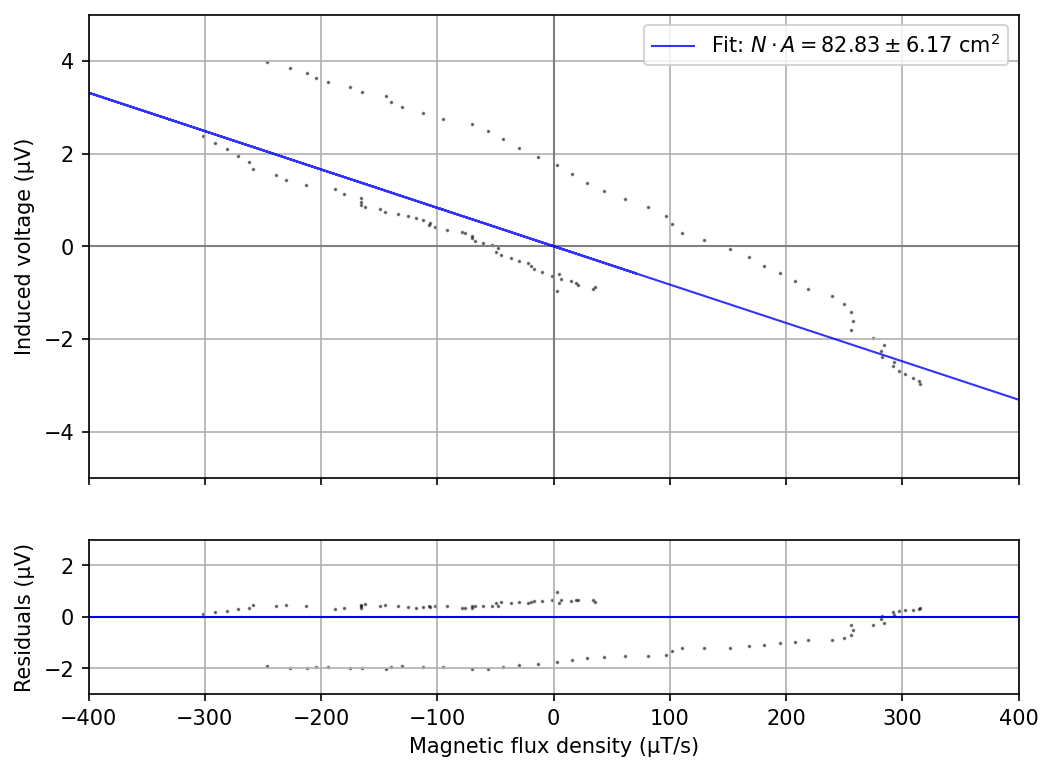

In [223]:
fig, [ax1, ax2] = plt.subplots(2,1,sharex=True,figsize=(8,6),gridspec_kw={'height_ratios': [3, 1]})

plt.sca(ax1)
plt.axhline(0, lw=1, c="gray")
plt.axvline(0, lw=1, c="gray")
plt.scatter(db, vv, s=0.5, color="black", alpha=0.5)
plt.plot(db*2, fit(db*2, A), color="blue", lw=1, alpha=0.8, label=f"Fit: $N\cdot A = {A*1e4:.2f} \pm {dA*1e4:.2f}$ cm$^2$")
plt.ylabel("Induced voltage (µV)")
plt.grid()
plt.legend()
plt.xlim(-400, 400)
plt.ylim(-5,5)

plt.sca(ax2)
plt.scatter(db, fit(db, A) - vv, s=0.5, color="black", alpha=0.5)
plt.axhline(0, lw=1, color="blue")
plt.ylim(-3,3)
plt.grid()
plt.xlabel("Magnetic flux density (µT/s)")
plt.ylabel("Residuals (µV)")
plt.show()

NameError: name 'w' is not defined

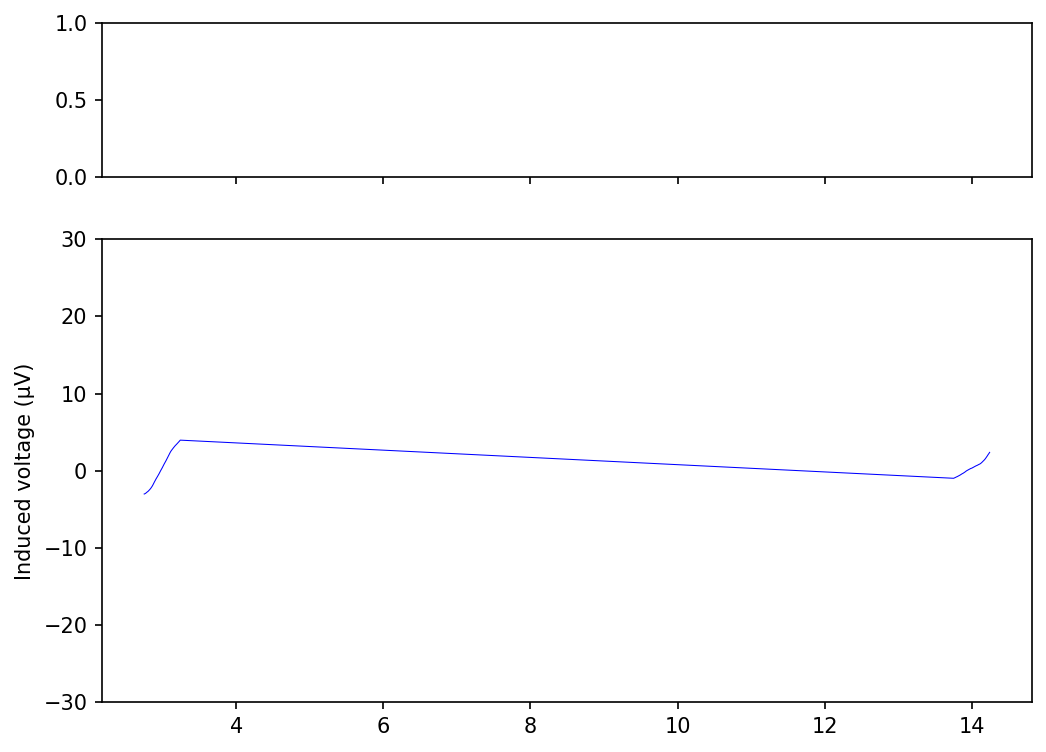

In [203]:
fig, [ax2, ax1] = plt.subplots(2,1,sharex=True,figsize=(8,6),gridspec_kw={'height_ratios': [1, 3]})

ax1.plot(t, v, lw=0.5, color="blue", label="Raw data")
ax1.set_ylabel("Induced voltage (µV)")
ax1.set_ylim(-30,30)

ax1.plot(t, fit(w,B,z)*np.pi/2, color="purple", alpha=0.5, lw=2)
ax1.plot(t, -fit(w,B,z)*np.pi/2, color="purple", alpha=0.5, lw=2, label="Fitted envelope")
ax1.legend()
ax1.grid()

ax2.plot(t, w, lw=1, color="orange")

ax2.grid()
ax2.set_ylabel("Ang. vel. (rad/s)")
ax1.set_xlabel("Time (s)")
ax2.set_ylim(-30,30)
ax2.set_xlim(0,55)

plt.margins(0)

plt.show()

In [ ]:
plt.figure?